In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [2]:
!ls

'coma_MGS_RaDecZ_XYZ:0.00|0.06.csv'   disperse_sdss7_coma.ipynb
 _disperse_01			      DR5_cluster-catalog_v1.1.fits
 _disperse_02			      MGS
 _disperse_03			      MGS_coma_2D_ascii.txt
 _disperse_04			      MGS_coma_cart_ascii.txt
 DisPerSe.ipynb			      README.md
 disperse_MGS_coma_2D.ipynb	      SDSS
 disperse_MGS_coma_cart.ipynb	      visual.ipynb
 disperse_MGS_coma.ipynb


In [3]:
# galaxies = pd.read_csv('SDSS_DR7.csv')

In [4]:
# galaxies = galaxies.loc[galaxies['z'] <= 0.3]
# galaxies = galaxies.loc[galaxies['z'] > 0]
# galaxies = galaxies.loc[galaxies['petroMag_r'] <= 17.77]
# galaxies = galaxies.loc[galaxies['zWarning'] == 0]
# galaxies = galaxies.loc[galaxies['zConf'] > 0.35]
# galaxies.columns = ['RA', 'DEC', 'Z', 'CX', 'CY', 'CZ', 'zErr', 'zConf', 'zWarning', 'type', 'petroMag_r']
# galaxies_rdz = galaxies[['RA', 'DEC', 'Z']]

In [5]:
# galaxies

In [6]:
# galaxies_rdz

In [7]:
# coma = galaxies_rdz[
#         (coma_ra_int[0] < galaxies_rdz['RA']) & (galaxies_rdz['RA'] < coma_ra_int[1]) & \
#         (coma_dec_int[0] < galaxies_rdz['DEC']) & (galaxies_rdz['DEC'] < coma_dec_int[1]) & \
#         (coma_z_int[0] < galaxies_rdz['Z']) & (galaxies_rdz['Z'] < coma_z_int[1])
#     ]
# coma.reset_index(drop=True, inplace=True)

In [8]:
coma = pd.read_csv('coma_MGS_RaDecZ_XYZ:0.00|0.06.csv')

coma_ra_int = (130, 260)
coma_dec_int = (-10, 70)
coma_z_int = (0.00545, 0.04135)

coma = coma[
        (coma_ra_int[0] <= coma['RA']) & (coma['RA'] <= coma_ra_int[1]) & \
        (coma_dec_int[0] <= coma['DEC']) & (coma['DEC'] <=coma_dec_int[1]) & \
        (coma_z_int[0] <= coma['Z']) & (coma['Z'] <= coma_z_int[1])
    ]
coma.reset_index(drop=True, inplace=True)

In [9]:
coma

,RA,DEC,Z,CX,CY,CZ
0,146.714217,-1.041278,0.021265,-78.234023,51.362363,-1.701025
1,147.176391,-0.354031,0.006325,-23.476451,15.143235,-0.172623
2,146.751726,-0.408398,0.035831,-131.446368,86.174354,-1.120350
3,146.355774,-0.143377,0.030758,-112.460623,74.843849,-0.338046
4,146.299850,-0.120005,0.030694,-112.154018,74.797855,-0.282353
...,...,...,...,...,...,...
50952,259.398924,34.107623,0.038559,-25.748777,-137.573081,94.788537
50953,259.783099,33.571375,0.037837,-24.518062,-136.035405,91.738440
50954,259.763021,34.008389,0.038148,-24.639867,-136.437318,93.546355
50955,259.206415,31.755735,0.023720,-16.616680,-87.160705,54.920385


In [10]:
file_name = 'MGS_coma_2D_ascii.txt'
with open(file_name, 'w') as coma_f:
    coma_f.write('# px py\n')
    for i in range(coma.shape[0]):
        t = coma.iloc[i]
        coma_f.write(f'{t.RA}\t{t.DEC}\n')

In [11]:
SIGMA = 3
SMOOTH = 1
BOARD = 'smooth'

In [12]:
!_disperse_02/bin/delaunay_2D {file_name} -btype {BOARD} -smooth {SMOOTH}


reading MGS_coma_2D_ascii.txt (ASCII) ... done. (50957 lines)
Margin set to 0.0166802 (actual size is ~2.17198).
Tesselating 50957 particles (2D) ... (+0 in boundary)
         Some points have identical coordinates !
 done. (0.05s elapsed)
Circumsphere test was skipped.
Computing density ... done.
Building smooth boundaries (192 guards):  tesselation ...  generating ... cleaning up ... done. (+2679 particles)
Adding 2679 particles ... done.
Computing density ... done.
All done in 0.09 s.
Converting tesselation to NDnetwork ... done.
Smoothing 1 times ... done.
Will write network to file 'MGS_coma_2D_ascii.txt.NDnet'.
All done.

Network was saved as : MGS_coma_2D_ascii.txt.NDnet
   comment: 'No cosmological conversion.'
   2D-Network has 50980 vertices.
   periodicity: non-periodic.
   Available faces: 152259 1-F, 101280 2-F.
   Bounding box: x0=[129.893,-3.81803],
                 delta=[130.213,73.8453].
   Available fields: 'field_value'(0), 'log_field_value'(0), 'mass'(0)
         

In [13]:
!_disperse_02/bin/mse {file_name}.NDnet -upSkl -nsig {SIGMA}


****** MSE v0.9.24 (64 bits) ******
Will read network from file 'MGS_coma_2D_ascii.txt.NDnet'.
Loading 2D network from file "MGS_coma_2D_ascii.txt.NDnet" ... done.
Computing 2-faces lists for vertice ... done.
Building mask ... done. (738 1-faces on boundary)
*********************************
Starting Morse-Smale complex computation.
Computing discrete gradient for 304519 cells:
   Identifying (1,2)-cell pairs:
      Sorting 152259 1-cells (asc.) ... done.
      Computing MST ... (components) done.(1940/101280 comp.)
      Computing discrete Gradient (1940 comp.) ... done.
   Identifying (1,0)-cell pairs:
      Computing MST ... (components) done.(3804/50980 comp.)
      Computing discrete Gradient (3804 comp.) ... done.
   Critical cells : 3804(+0) 0-cells, 5743(+5743) 1-cells, 1940(+0) 2-cells.
Computing discrete Morse-Smale complex: 
    11487 critical points: 1940 min, 5743 s1, 3804 max.
    * minima: SKIPPED.
    * 1-saddle: no manifolds, A.(G+)/D.(G+) arcs ... done.
    * maxima

In [14]:
!_disperse_02/bin/skelconv {file_name}.NDnet_s{SIGMA}.up.NDskl -to NDskl_ascii

Will read skeleton from file 'MGS_coma_2D_ascii.txt.NDnet_s3.up.NDskl'.
Loading 2D skeleton from file MGS_coma_2D_ascii.txt.NDnet_s3.up.NDskl ... done.
Will write skeleton to file 'MGS_coma_2D_ascii.txt.NDnet_s3.up.NDskl.a.NDskl'.
Saving 2D skeleton to ASCII file MGS_coma_2D_ascii.txt.NDnet_s3.up.NDskl.a.NDskl ... done.


In [15]:
def read_skl_ascii_RaDecZ(file_name):
    cps = []
    fils = []
    with open(file_name) as f:
        s = ''
        while s != '[CRITICAL POINTS]':
            s = f.readline().strip()
        cp_num = int(f.readline().strip())
        for i in range(cp_num):
            cp = {}
            type_, ra, dec, _, _, _ = tuple(map(float, f.readline().split()))
            cp['RA'] = ra
            cp['DEC'] = dec
            cp['type'] = int(type_)
            cps.append(cp)
            for i in range(int(f.readline())):
                f.readline()
        
        while s != '[FILAMENTS]':
            s = f.readline().strip()
        fil_num = int(f.readline())
        for i in range(fil_num):
            fil = {}
            cp1, cp2, sp_num = tuple(map(int, f.readline().split()))
            fil['CP1_id'] = cp1
            fil['CP2_id'] = cp2
            fil['sample_points'] = []
            for j in range(sp_num):
                fil['sample_points'].append(tuple(map(float, f.readline().split())))
            fils.append(fil)
            
    return cps, fils

In [16]:
cps, fils = read_skl_ascii_RaDecZ(f'{file_name}.NDnet_s{SIGMA}.up.NDskl.a.NDskl')

In [17]:
!rm {file_name}.* test_smooth.dat

In [18]:
cps[0]

{'RA': 194.914, 'DEC': 27.8546, 'type': 2}

100%|██████████| 229/229 [00:00<00:00, 1721.82it/s]


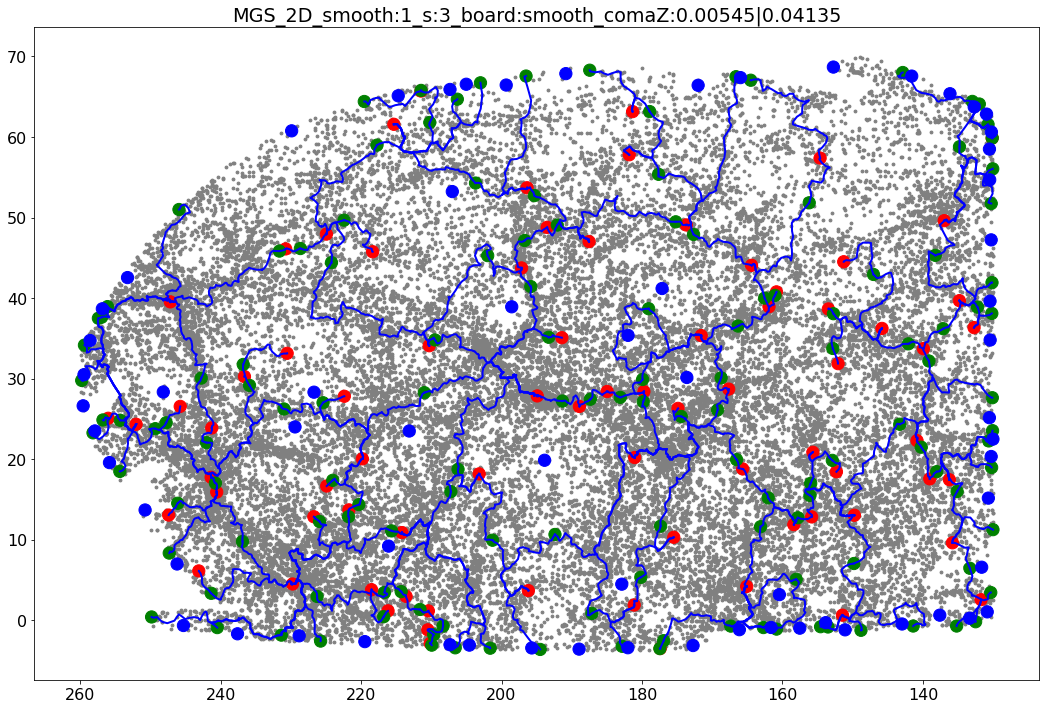

In [19]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(18, 12))

plt.scatter(coma['RA'], coma['DEC'], c='grey', s=8)

d = {2: 'red', 1: 'green', 0: 'blue'}
x = []
y = []
c = []
for cp in cps:
    x.append(cp['RA'])
    y.append(cp['DEC'])
    c.append(d[cp['type']])

for fil in tqdm(fils):
    points = fil['sample_points']
    x_f = []
    y_f = []
    for i in range(len(points)):
        x_f.append(points[i][0])
        y_f.append(points[i][1])
    plt.plot(x_f, y_f, 'b', linewidth=2)
    
plt.scatter(x, y, c=c, s=150)
    
ax = fig.get_axes()
ax[0].invert_xaxis()
plt.title(f'MGS_2D_smooth:{SMOOTH}_s:{SIGMA}_board:{BOARD}_comaZ:{coma_z_int[0]}|{coma_z_int[1]}')
plt.savefig(f'MGS_2D_smooth:{SMOOTH}_s:{SIGMA}_board:{BOARD}_comaZ:{coma_z_int[0]}|{coma_z_int[1]}', format='jpg')